In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Definir la ruta base donde se almacenan las imágenes
drive_path = '/content/drive/MyDrive/coco_cats_dogs'
images_dir = os.path.join(drive_path, 'images')

# Definir las categorías
categories = ['cats', 'dogs', 'cats_dogs']

In [ ]:
# Definir las extensiones de archivos de imagen válidas
valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')

# Verificar y listar contenido de cada carpeta
for category in categories:
    category_path = os.path.join(images_dir, category)
    if os.path.exists(category_path):
        files = os.listdir(category_path)
        # Filtrar solo archivos con extensiones válidas
        images = [f for f in files if f.lower().endswith(valid_extensions)]
        print(f"\nTotal de imágenes en '{category}': {len(images)}")
        if len(images) > 0:
            print(f"Algunas imágenes en '{category}': {images[:5]}")
        else:
            print(f"No se encontraron imágenes en '{category}'.")
    else:
        print(f"\nCarpeta '{category}' no existe en {images_dir}.")


Total de imágenes en 'cats': 500
Algunas imágenes en 'cats': ['000000516194.jpg', '000000155749.jpg', '000000295016.jpg', '000000295017.jpg', '000000409707.jpg']

Total de imágenes en 'dogs': 503
Algunas imágenes en 'dogs': ['000000516194.jpg', '000000532617.jpg', '000000180373.jpg', '000000401681.jpg', '000000524594.jpg']

Total de imágenes en 'cats_dogs': 29
Algunas imágenes en 'cats_dogs': ['000000516194.jpg', '000000532617.jpg', '000000180373.jpg', '000000401681.jpg', '000000524594.jpg']


In [ ]:
# Definir las categorías y labels
categories = ['cats', 'dogs', 'cats_dogs']
labels_dict = {'cats': 0, 'dogs': 1, 'cats_dogs': 2}

# Inicializar listas para almacenar datos
data = []
labels = []

# Escalar las imágenes
img_height, img_width = 224, 224

images_dir = os.path.join(drive_path, 'images')

# Cargar imágenes y asignar etiquetas
for category in categories:
    category_path = os.path.join(images_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            # Cargar la imagen
            img = image.load_img(img_path, target_size=(img_height, img_width))
            img_array = image.img_to_array(img)
            img_array /= 255.0  # Normalizar a [0,1]
            data.append(img_array)
            labels.append(labels_dict[category])
        except Exception as e:
            print(f"Error al procesar {img_path}: {e}")

print(f"Total de imágenes cargadas: {len(data)}")


Total de imágenes cargadas: 1032


In [ ]:
from tensorflow.keras import layers, models, regularizers

# Definir el modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dropout(0.5),  # Dropout para regularización
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')  # Softmax para clasificación multiclase
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,961,859 (18.93 MB)

 Trainable params: 4,961,155 (18.93 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compilar el modelo
model.compile(
    loss='sparse_categorical_crossentropy',  # Para multi-clase
    optimizer=Adam(learning_rate=0.0001),  # Learning rate bajo para convergencia estable
    metrics=['accuracy']
)

In [ ]:
from sklearn.model_selection import train_test_split

data = np.array(data)
labels = np.array(labels)
#división del dataset
X_train, X_val, y_train, y_val = train_test_split(
    data, labels, test_size=0.1, random_state=42
)

print(f"Entrenamiento: {X_train.shape[0]} imágenes")
print(f"Validación: {X_val.shape[0]} imágenes")


Entrenamiento: 928 imágenes
Validación: 104 imágenes


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/coco_cats_dogs/best_model.keras',
                    save_best_only=True, monitor='val_loss', mode='min', verbose=1)
]

# Entrenamiento del modelo con los parametros:
epochs = 20

history = model.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    batch_size=32,
    callbacks=callbacks
)

# Guardar el modelo final
model.save('/content/drive/MyDrive/coco_cats_dogs/final_model.keras')
print("Modelo guardado en '/content/drive/MyDrive/coco_cats_dogs/final_model.keras'")


Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5047 - loss: 7.4767
Epoch 1: val_loss improved from inf to 6.53880, saving model to /content/drive/MyDrive/coco_cats_dogs/best_model.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 210s 7s/step - accuracy: 0.5055 - loss: 7.4649 - val_accuracy: 0.0385 - val_loss: 6.5388
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6165 - loss: 6.1956
Epoch 2: val_loss did not improve from 6.53880
29/29 ━━━━━━━━━━━━━━━━━━━━ 248s 6s/step - accuracy: 0.6168 - loss: 6.1926 - val_accuracy: 0.0385 - val_loss: 7.1252
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.6716 - loss: 5.7946
Epoch 3: val_loss did not improve from 6.53880
29/29 ━━━━━━━━━━━━━━━━━━━━ 190s 7s/step - accuracy: 0.6721 - loss: 5.7938 - val_accuracy: 0.0385 - val_loss: 7.3909
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7109 - loss: 5.6034
Epoch 4: val_loss did not improve from 6.53880
29/29 ━━━━━━━━━━━━━━━━━━━━ 203s 7s/step - accuracy: 0.7106 -

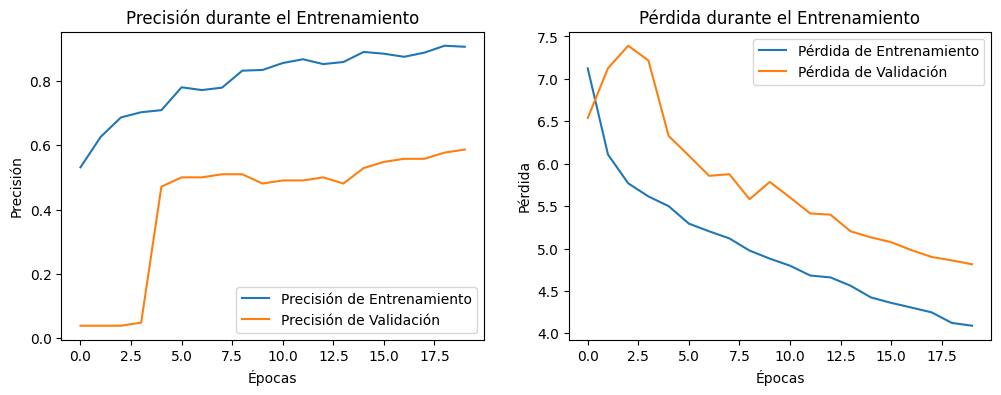

In [ ]:
import matplotlib.pyplot as plt

# Graficar precisión
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


## Ejemplo de predicciones con el modelo entrenado

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/cats/000000394036.jpg - Predicción: cats


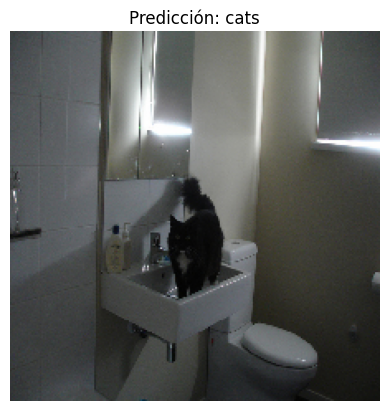

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/dogs/000000393685.jpg - Predicción: cats_dogs


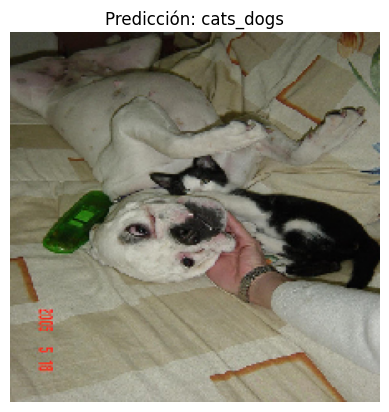

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/cats/000000303116.jpg - Predicción: cats


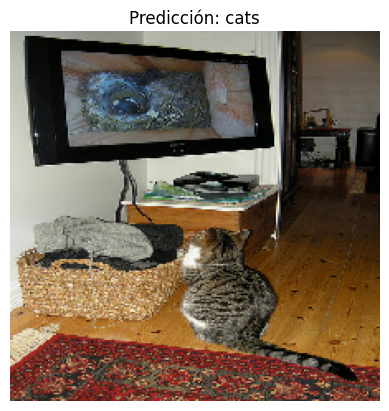

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/dogs/000000254138.jpg - Predicción: dogs


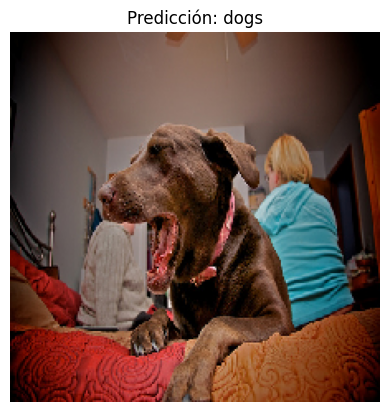

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/dogs/000000148193.jpg - Predicción: dogs


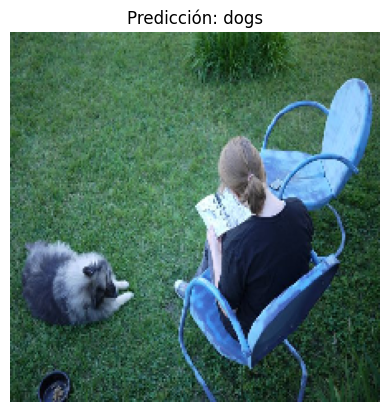

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/dogs/000000246575.jpg - Predicción: dogs


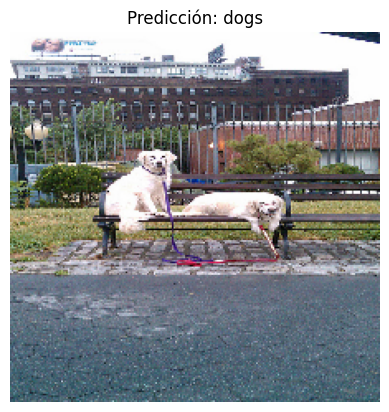

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/cats/000000254540.jpg - Predicción: cats


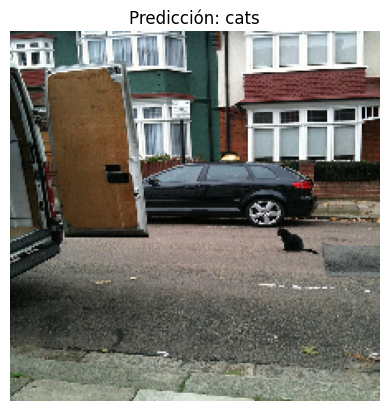

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/cats/000000491795.jpg - Predicción: cats


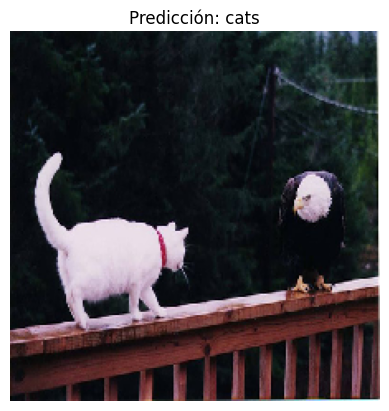

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/dogs/000000450672.jpg - Predicción: dogs


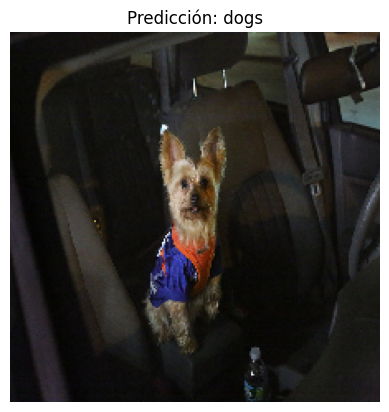

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Imagen: /content/drive/MyDrive/coco_cats_dogs/images/cats/000000361127.jpg - Predicción: cats


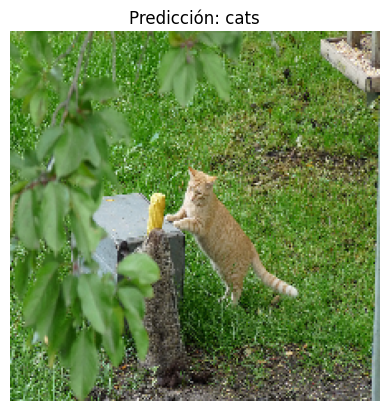

In [ ]:

# Ruta base donde se almacenan las imágenes
drive_path = '/content/drive/MyDrive/coco_cats_dogs'
images_dir = os.path.join(drive_path, 'images')

# Definir las categorías
categories = ['cats', 'dogs', 'cats_dogs']

# Cargar el modelo previamente entrenado
model = load_model('/content/drive/MyDrive/coco_cats_dogs/best_model.keras')

# Función para cargar y preprocesar una imagen
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Hacer el batch
    img_array /= 255.0  # Normalizar imagen
    return img_array

#obtener rutas
all_images = []
for category in categories:
    category_path = os.path.join(images_dir, category)
    images = [os.path.join(category_path, f) for f in os.listdir(category_path) if f.endswith('.jpg') or f.endswith('.png')]
    all_images.extend(images)

random_images = random.sample(all_images, 10)  # Selecciona 10 imagenes random

# Realizar predicciones
for img_path in random_images:
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)  # Obtener la clase con la mayor probabilidad
    print(f"Imagen: {img_path} - Predicción: {categories[predicted_class]}")

    # Mostrar la imagen + predicción
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"Predicción: {categories[predicted_class]}")
    plt.axis('off')
    plt.show()


# Predicción de felinos

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt